In [220]:
from keras.models import load_model
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import json
import nltk
import random
import numpy as np
from random import seed

In [221]:
model = load_model('../chatbot/chatbot_model.h5')

In [222]:
lemmatizer = WordNetLemmatizer()
op = open('intents.json')
intents = json.load(op)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [223]:
words = []
classes = []
documents = []
ignoreLetters = ['?', '!', '.', '.']

In [224]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        wordList = nltk.word_tokenize(pattern)
        words.extend(wordList)
        documents.append((wordList, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [225]:
words = [stemmer.stem(word) for word in words if word not in ignoreLetters]
wrodds = sorted(set(words))
classes = sorted(set(classes))

In [226]:
training = []
outputEmpty = [0] * len(classes)

In [227]:
for document in documents:
    # print(document)
    bag = []
    wordPatterns = document[0]
    wordPatterns = [lemmatizer.lemmatize(word.lower()) for word in wordPatterns]
    for word in words:
        bag.append(1) if word in wordPatterns else bag.append(0)
    
    outputRow = list(outputEmpty)
    outputRow[classes.index(document[1])] = 1
    training.append([bag, outputRow])

In [228]:
random.shuffle(training)
training = np.array(training, dtype='object')

x = list(training[:, 0])
y = list(training[:, 1])

In [229]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

In [230]:
x_test

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,

In [231]:
ypred = model.predict(x_test)

1/1 [==============================] - 0s 72ms/step


In [232]:
ypred

array([[1.67236954e-06, 5.58230851e-04, 9.98256743e-01, 8.90392585e-06,
        1.52790584e-04, 1.76412359e-04, 2.34939233e-08, 1.44840451e-08,
        3.38055941e-07, 3.55610708e-10, 9.92453806e-07, 8.06589305e-05,
        9.87832550e-07, 2.52884131e-08, 3.18615021e-05, 1.04927778e-07,
        4.20852642e-09, 4.59816988e-07, 1.51158776e-04, 2.89446354e-04,
        5.53351811e-07, 2.65111808e-08, 1.57048703e-08, 7.76334943e-08,
        1.91516447e-04, 3.97307076e-09, 1.99395291e-08, 4.42834471e-06,
        4.44608231e-05, 5.61581487e-07, 4.72882348e-05, 2.44429032e-07],
       [5.06715842e-05, 1.32136265e-04, 1.97135052e-03, 1.85365207e-04,
        3.18900158e-04, 9.63711209e-05, 4.35459551e-05, 7.53781933e-07,
        4.89176091e-05, 2.74598193e-07, 3.64549123e-06, 2.08091762e-04,
        2.80967270e-05, 5.02019131e-04, 4.11714893e-04, 2.46235693e-04,
        4.45823607e-05, 1.62213546e-04, 2.30723730e-04, 3.07133741e-04,
        4.20343858e-05, 6.37074118e-06, 9.19309059e-06, 1.12537

In [233]:
y_temp = np.argmax(ypred, axis= 0)
y_temp

array([12, 11,  0,  3,  9, 13,  3,  6,  6,  3, 13,  5, 16, 16, 11,  7,  7,
        2, 13, 16,  8, 15, 16, 16,  1, 15, 10,  8, 14, 10, 16, 16],
      dtype=int64)

In [234]:
ypred_arg= np.argmax(ypred, axis= 1)
ytest_arg= np.argmax(y_test, axis= 1)

In [235]:
from sklearn.metrics import confusion_matrix
ass1 = confusion_matrix(ytest_arg, ypred_arg)

In [236]:
ass1

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0,

In [237]:
import pandas as pd
cm_df = pd.DataFrame(ass1)

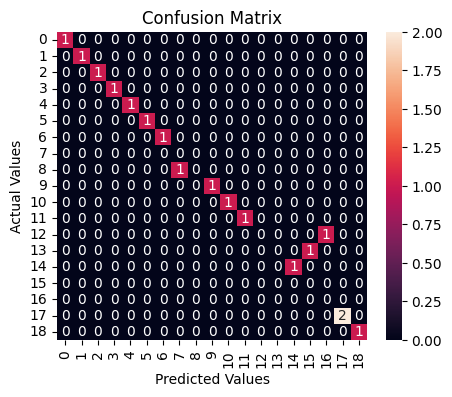

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [239]:
from sklearn.metrics import precision_score
precision_score(ytest_arg, ypred_arg, average=None)

c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1.])

In [240]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest_arg, ypred_arg)
# b= seed(a = accuracy_score(ytest_arg, ypred_arg))
# print(b)

0.8235294117647058

In [241]:
from sklearn.metrics import recall_score
recall_score(ytest_arg, ypred_arg, average=None)

c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1.])

In [242]:
from sklearn.metrics import classification_report
 
print(classification_report(ytest_arg, ypred_arg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          24       1.00      1.00      1.00         1
          25       0.00      0.00      0.00         0
          27       0.00      0.00      0.00         0
          28       1.00    

c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [243]:
from sklearn import metrics
ass1_display = metrics.ConfusionMatrixDisplay(confusion_matrix=ass1, display_labels=[False, True])



====================trial n error===================================================================================

In [244]:
#predict berdasarkan data pada x_test
x_pred = model.predict(x_test)

1/1 [==============================] - 0s 40ms/step


In [245]:
x_pred

array([[1.67236954e-06, 5.58230851e-04, 9.98256743e-01, 8.90392585e-06,
        1.52790584e-04, 1.76412359e-04, 2.34939233e-08, 1.44840451e-08,
        3.38055941e-07, 3.55610708e-10, 9.92453806e-07, 8.06589305e-05,
        9.87832550e-07, 2.52884131e-08, 3.18615021e-05, 1.04927778e-07,
        4.20852642e-09, 4.59816988e-07, 1.51158776e-04, 2.89446354e-04,
        5.53351811e-07, 2.65111808e-08, 1.57048703e-08, 7.76334943e-08,
        1.91516447e-04, 3.97307076e-09, 1.99395291e-08, 4.42834471e-06,
        4.44608231e-05, 5.61581487e-07, 4.72882348e-05, 2.44429032e-07],
       [5.06715842e-05, 1.32136265e-04, 1.97135052e-03, 1.85365207e-04,
        3.18900158e-04, 9.63711209e-05, 4.35459551e-05, 7.53781933e-07,
        4.89176091e-05, 2.74598193e-07, 3.64549123e-06, 2.08091762e-04,
        2.80967270e-05, 5.02019131e-04, 4.11714893e-04, 2.46235693e-04,
        4.45823607e-05, 1.62213546e-04, 2.30723730e-04, 3.07133741e-04,
        4.20343858e-05, 6.37074118e-06, 9.19309059e-06, 1.12537

In [246]:
#numpy argmax dengan axis1 pada data hasil prediction
x_predargmax = np.argmax(x_pred, axis= 1)
x_predargmax

array([ 2, 24, 17,  6, 28, 11,  7, 15, 27,  4, 29,  1,  0, 18, 28, 25, 19],
      dtype=int64)

In [247]:
#numpy argmax dengan axis1 pada data aslinya
x_truearg = np.argmax(x_test, axis= 1)
x_truearg

array([133,  23, 116,  13,   6, 121,  39,  13, 146,  93,  40, 105,  42,
        13,   6,  13, 150], dtype=int64)

In [248]:
y

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0],
 [0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,

In [249]:
#cf disusun berdasarkan data asli dan dan data prediction
#kedua parameter jumlah labelnya harus sama
from sklearn.metrics import confusion_matrix
confusion_matrix(x_truearg, x_predargmax)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 

In [250]:
ass = confusion_matrix(x_truearg, x_predargmax)

In [251]:
import pandas as pd

In [252]:
cm_df = pd.DataFrame(ass)

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

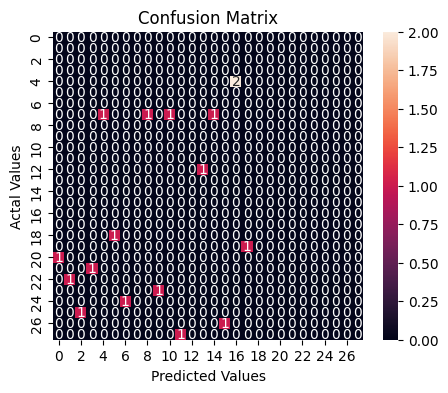

In [254]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [255]:
from sklearn.metrics import accuracy_score
accuracy_score(x_truearg, x_predargmax)

0.0

In [256]:
from sklearn.metrics import precision_score
precision_score(x_truearg, x_predargmax, average=None)

c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])